In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from astropy.io import fits


In [2]:
filepath = '/Users/jimenagonzalez/research/DSPL/SpaceWarps_Inspection/Results/fits_files/'
# Candidates above threshold
hdu_list = fits.open(filepath + 'candidates_experts.fits')
images_cand = hdu_list[1].data
cand_jimena = pd.DataFrame(hdu_list[2].data)
hdu_list.close()
print(len(cand_jimena))

2502


In [3]:
data = pd.read_csv('intersection.csv')
data = data.dropna()  # Remove rows with NaN values
data = data.replace([np.inf, -np.inf], np.nan).dropna()  # Remove rows with infinite values

In [4]:
print(len(data))
data.head()

753222


,K_RA,K_DEC,K_SCORE,Y3_COADD_OBJECT_ID,J_RA,J_DEC,score_sims,score_real,score_both,COADD_OBJECT_ID,...,G_DEC,SINGLE,RING,SMOOTH,COMPANIONS,SDSS_SPIRALS,DES_SPIRALS,CROWDED,ARTIFACTS,MOST_NEGATIVES
0,44.737850,0.295359,0.000012,333398760,44.737850,0.295359,0.0000,0.0,0.0,1356898855,...,0.295326,0.0002,0.0001,0.0012,0.0003,0.0005,0.0002,0.0001,0.0009,0.9966
1,44.990078,0.077219,0.000005,333407081,44.990078,0.077219,0.0002,0.0,0.0,1357045687,...,0.077188,0.0001,0.0001,0.0002,0.0052,0.0019,0.0006,0.0002,0.0015,0.9902
2,44.892011,0.149623,0.000006,333404699,44.892011,0.149623,0.0000,0.0,0.0,1357040498,...,0.149593,0.0000,0.0000,0.0001,0.0004,0.0005,0.0006,0.0001,0.0015,0.9967
3,44.952158,0.111372,0.000014,333405923,44.952158,0.111372,0.0000,0.0,0.0,1357043160,...,0.111335,0.0001,0.0000,0.0004,0.0018,0.0001,0.0001,0.0040,0.0013,0.9922
4,44.834282,0.290406,0.000004,333398843,44.834282,0.290406,0.0000,0.0,0.0,1356898678,...,0.290377,0.0001,0.0001,0.0002,0.0001,0.0009,0.0001,0.0001,0.0001,0.9983


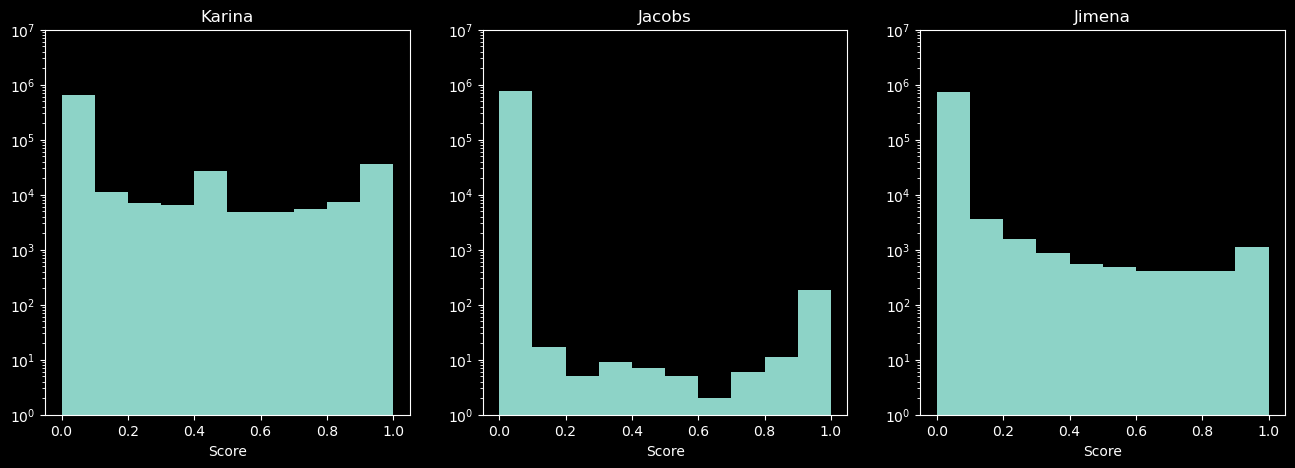

In [5]:
plt.figure(figsize=(16,5)) 
    
plt.subplot(1,3,1)
plt.title('Karina')
plt.hist(data['K_SCORE'])
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)

plt.subplot(1,3,2)
plt.title('Jacobs')
plt.hist(data['score_both'])
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)

plt.subplot(1,3,3)
plt.title('Jimena')
plt.hist(data['SINGLE'])
plt.xlabel('Score')
plt.yscale('log')
plt.ylim(1, 10**7)

plt.show()


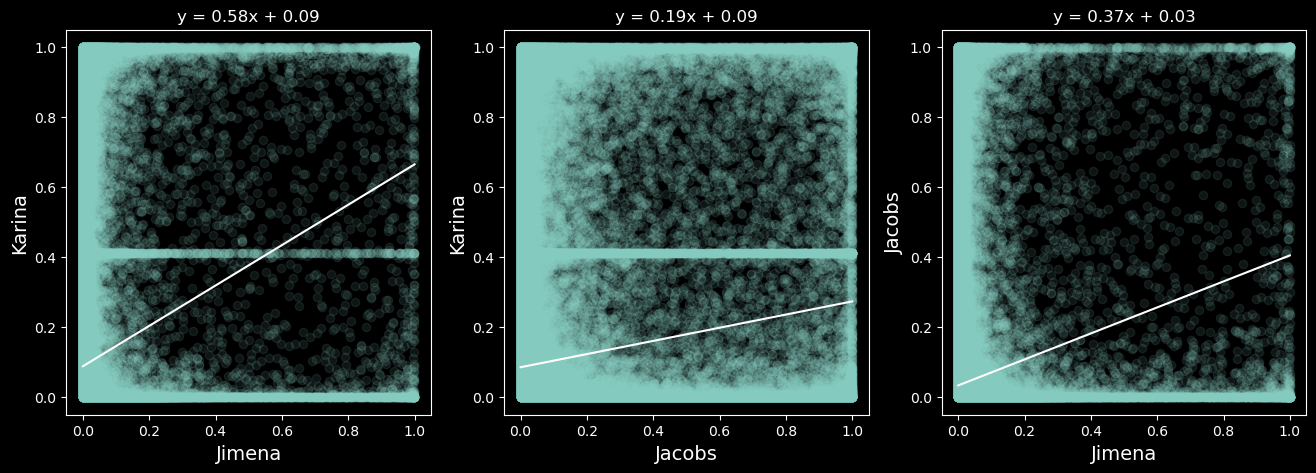

In [6]:
linear_regressor = LinearRegression()

#Studying correlations
plt.figure(figsize=(16,5)) 
    
X, Y = data['SINGLE'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,1)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.plot(data['SINGLE'], data['K_SCORE'], 'o', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['score_sims'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,2)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
plt.plot(data['score_sims'], data['K_SCORE'], 'o', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['SINGLE'].values.reshape(-1, 1) , data['score_sims'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,3)
plt.xlabel('Jimena', fontsize=14)
plt.ylabel('Jacobs', fontsize=14)
plt.plot(data['SINGLE'], data['score_sims'], 'o', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')
        
plt.show()



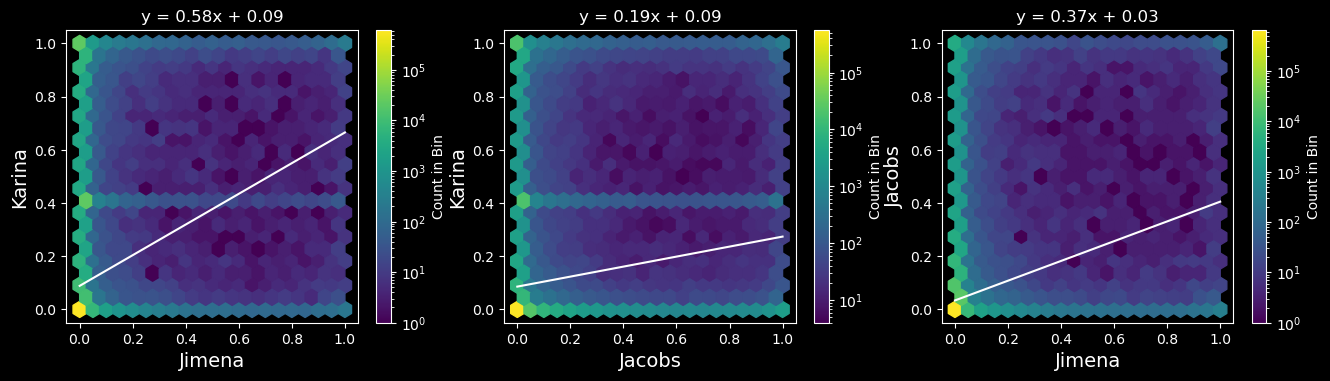

In [7]:
import matplotlib.colors as mcolors

plt.figure(figsize=(16,3.8)) 
    
X, Y = data['SINGLE'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,1)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.hexbin(data['SINGLE'], data['K_SCORE'], gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar(label='Count in Bin')
#plt.plot(data['SINGLE'], data['K_SCORE'], 'o', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['score_sims'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,2)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
#plt.plot(data['score_sims'], data['K_SCORE'], 'o', alpha=0.1)
plt.hexbin(data['score_sims'], data['K_SCORE'], gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar(label='Count in Bin')
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['SINGLE'].values.reshape(-1, 1) , data['score_sims'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,3)
plt.xlabel('Jimena', fontsize=14)
plt.ylabel('Jacobs', fontsize=14)
#plt.plot(data['SINGLE'], data['score_sims'], 'o', alpha=0.1)
plt.hexbin(data['SINGLE'], data['score_sims'], gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
plt.colorbar(label='Count in Bin')
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')
        
plt.show()

In [8]:
cand_jimena.columns

Index(['COADD_OBJECT_ID', 'TILENAME', 'PROB', 'HPIX_16384', 'HPIX_4096',
       'DNF_ZMEAN_SOF', 'RA', 'DEC', 'FLUX_RADIUS_G', 'FLUX_RADIUS_R',
       'FLUX_RADIUS_I', 'FLUX_RADIUS_Z', 'KRON_RADIUS', 'GAP_FLUX_G',
       'MOF_BDF_FLUX_G', 'MOF_PSF_FLUX_G', 'SOF_BDF_FLUX_G', 'SOF_PSF_FLUX_G',
       'MAG_AUTO_G', 'MAG_APER_4_G', 'MAG_APER_8_G', 'SOF_BDF_G_1',
       'SOF_BDF_G_2', 'IMAFLAGS_ISO_G', 'IMAFLAGS_ISO_R', 'IMAFLAGS_ISO_I',
       'IMAFLAGS_ISO_Z', 'EXT_COADD', 'NEW_ID', 'CLASS', 'REPORTED',
       'SUBJECT_ID', 'SCORE', 'PROB_SING', 'PROB_DOUB'],
      dtype='object')

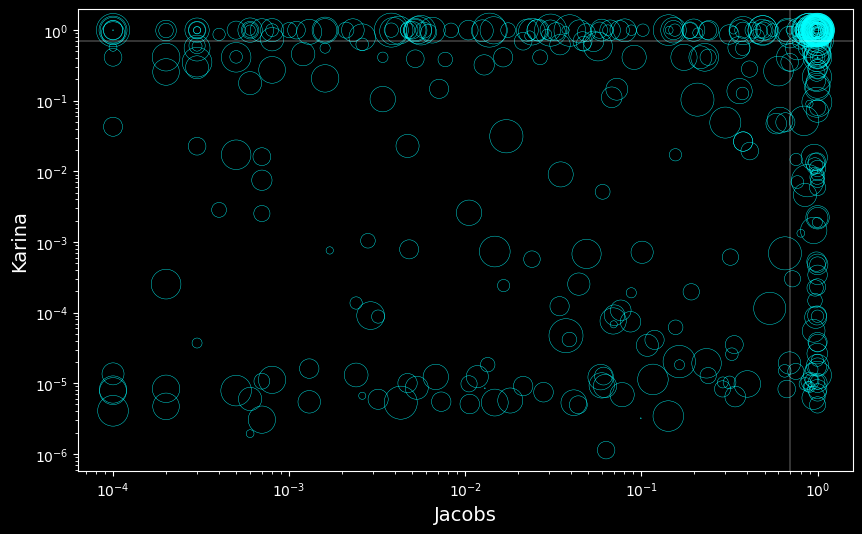

In [9]:
# In Jimena's candidates
cand_jimena = pd.read_csv('data/in_jimena.csv')
# Adding my expert scores to the data
cand_jimena = pd.merge(data, cand_jimena[['Aver_norm_wo_8', 'COADD_OBJECT_ID']],how ='inner', on='COADD_OBJECT_ID')
size = cand_jimena['Aver_norm_wo_8']*200 + [0.5]*len(cand_jimena)

plt.figure(figsize=(10,6)) 
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
plt.scatter(cand_jimena['score_sims'], cand_jimena['K_SCORE'], alpha=1., s=size.values, 
            edgecolors='#00FFFF', facecolors='none', linewidth=0.3)
plt.yscale("log")
plt.xscale("log")

plt.axhline(y=0.7, color='w', linestyle='-', linewidth=0.3)
plt.axvline(x=0.7, color='w', linestyle='-', linewidth=0.3)
    
plt.show()

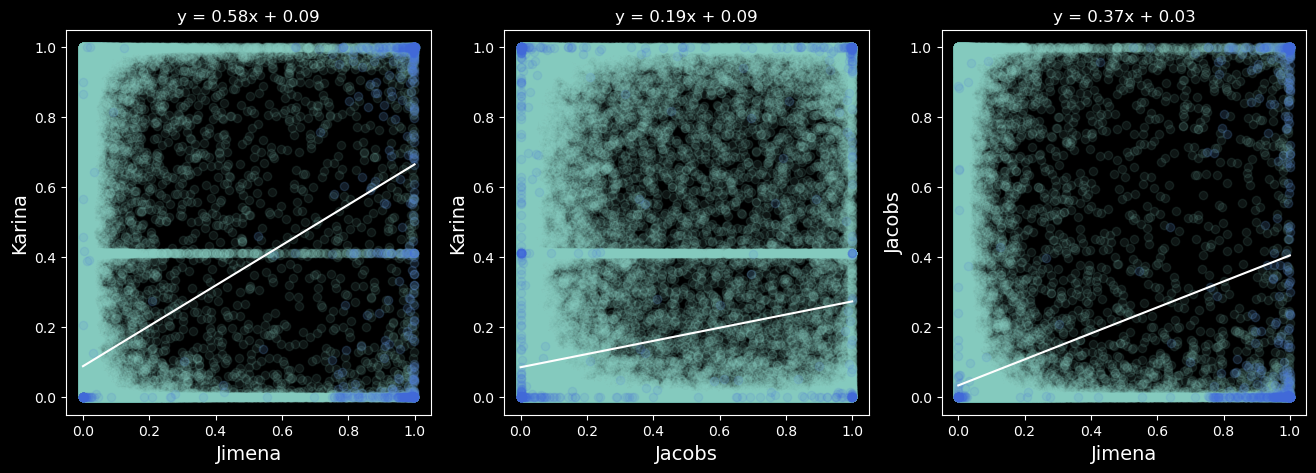

In [10]:
linear_regressor = LinearRegression()

#Studying correlations & adding Jimena's candidates
plt.figure(figsize=(16,5)) 
    
X, Y = data['SINGLE'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

#mask = data['COADD_OBJECT_ID'].isin(cand_jimena['COADD_OBJECT_ID'])
#data_tmp = data[mask]
#print(len(data_tmp))

plt.subplot(1,3,1)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jimena', fontsize=14)
plt.plot(data['SINGLE'], data['K_SCORE'], 'o', alpha=0.1)
filtered_data = data[data['COADD_OBJECT_ID'].isin(cand_jimena['COADD_OBJECT_ID'])]
plt.plot(filtered_data['SINGLE'], filtered_data['K_SCORE'], 'o', color='#4169E1', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['score_sims'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,2)
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
plt.plot(data['score_sims'], data['K_SCORE'], 'o', alpha=0.1)
filtered_data = data[data['COADD_OBJECT_ID'].isin(cand_jimena['COADD_OBJECT_ID'])]
plt.plot(filtered_data['score_sims'], filtered_data['K_SCORE'], 'o', color='#4169E1', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')

X, Y = data['SINGLE'].values.reshape(-1, 1) , data['score_sims'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

plt.subplot(1,3,3)
plt.xlabel('Jimena', fontsize=14)
plt.ylabel('Jacobs', fontsize=14)
plt.plot(data['SINGLE'], data['score_sims'], 'o', alpha=0.1)
filtered_data = data[data['COADD_OBJECT_ID'].isin(cand_jimena['COADD_OBJECT_ID'])]
plt.plot(filtered_data['SINGLE'], filtered_data['score_sims'], 'o', color='#4169E1', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')
        
plt.show()


628


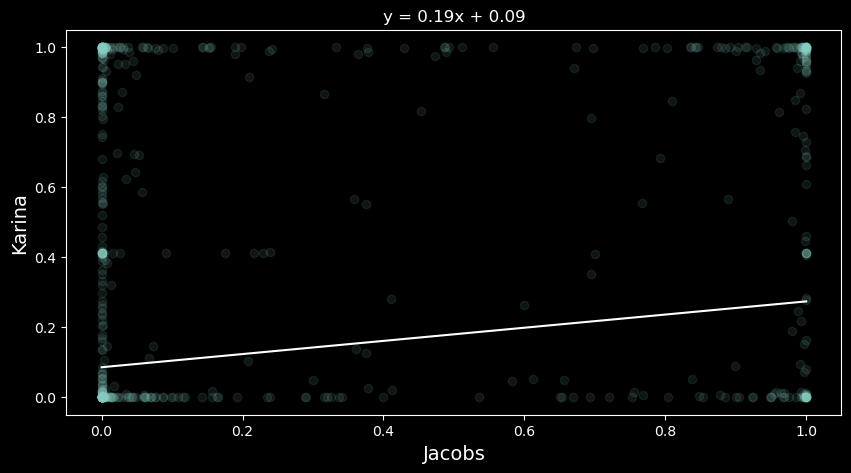

In [11]:
X, Y = data['score_sims'].values.reshape(-1, 1) , data['K_SCORE'].values.reshape(-1, 1) 
linear_regressor.fit(X, Y) 
x = np.linspace(0, 1 ,100)
y = linear_regressor.coef_[0]*x + linear_regressor.intercept_

#Studying correlations & adding Jimena's candidates
plt.figure(figsize=(10,5)) 
plt.ylabel('Karina', fontsize=14)
plt.xlabel('Jacobs', fontsize=14)
#plt.plot(data['score_sims'], data['K_SCORE'], 'o', alpha=0.1)
filtered_data = data[data['COADD_OBJECT_ID'].isin(cand_jimena['COADD_OBJECT_ID'])]
print(len(filtered_data))
plt.plot(filtered_data['score_sims'], filtered_data['K_SCORE'], 'o', alpha=0.1)
equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
plt.title(equation)
plt.plot(x, y, color='w')
#plt.yscale("log")
#plt.xscale("log")
    
plt.show()


NameError: name 'cbar' is not defined

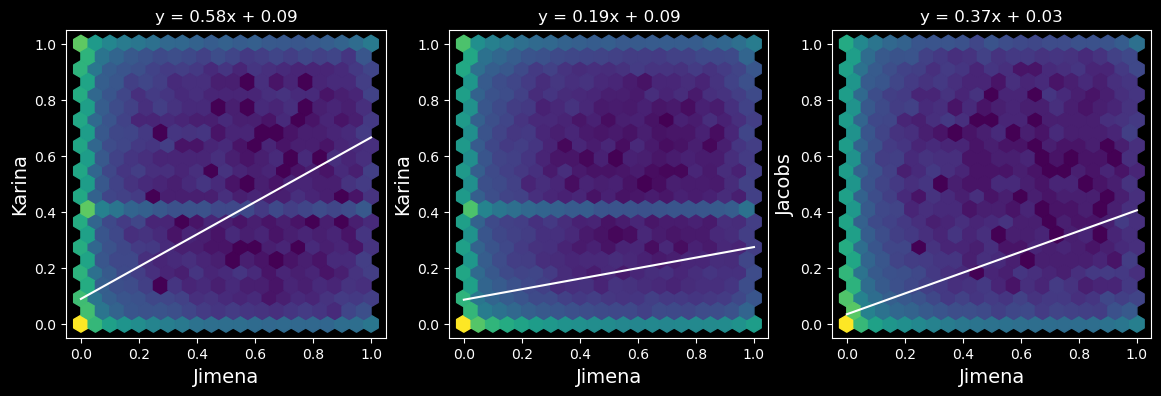

In [12]:
#plt.figure(figsize=(16, 5))

# Define width ratios for the subplots
width_ratios = [1, 1, 1]

# Initialize linear regressor outside the loop
linear_regressor = LinearRegression()

# Create subplots with specified width ratios
fig, axs = plt.subplots(1, 3, figsize=(14, 4), gridspec_kw={'width_ratios': width_ratios})

for ax, (x_data, y_data) in zip(axs, [(data['SINGLE'], data['K_SCORE']), (data['score_sims'], data['K_SCORE']), (data['SINGLE'], data['score_sims'])]):
    ax.set_ylabel('Karina' if ax != axs[2] else 'Jacobs', fontsize=14)
    ax.set_xlabel('Jimena' if ax != axs[2] else 'Jimena', fontsize=14)
    
    ax.hexbin(x_data, y_data, gridsize=20, cmap='viridis', norm=mcolors.LogNorm())
    
    linear_regressor.fit(x_data.values.reshape(-1, 1), y_data.values.reshape(-1, 1))
    x = np.linspace(0, 1, 100)
    y = linear_regressor.predict(x.reshape(-1, 1))
    
    ax.plot(x, y, color='w')
    equation = 'y = {:.2f}x + {:.2f}'.format(linear_regressor.coef_[0][0], linear_regressor.intercept_[0])
    ax.set_title(equation)

# Create a single colorbar for all subplots
#cbar = fig.colorbar(axs[0].collections[0], ax=axs, label='Count in Bin')
cbar.ax.tick_params(labelsize=12)

#plt.tight_layout()
plt.show()

In [ ]:
#I should see where the scored ones, or the published in the sled database are located.


#Studying correlations
plt.figure(figsize=(16,5)) 
    
plt.subplot(1,3,1)
plt.ylabel('Jacobs', fontsize=14)
plt.xlabel('Ring', fontsize=14)
plt.plot(data['score_sims'], data['RING'], 'o', alpha=0.1)

plt.subplot(1,3,2)
plt.ylabel('Jacobs', fontsize=14)
plt.xlabel('Smooth', fontsize=14)
plt.plot(data['score_sims'], data['SMOOTH'], 'o', alpha=0.1)

plt.subplot(1,3,3)
plt.ylabel('Jacobs', fontsize=14)
plt.xlabel('Companions', fontsize=14)
plt.plot(data['score_sims'], data['COMPANIONS'], 'o', alpha=0.1)
        
plt.show()
